In [14]:
import face_recognition
import numpy as np
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2

In [60]:
image = face_recognition.load_image_file("../data/raw/faces.jpeg")
face_bboxes = face_recognition.face_locations(image)

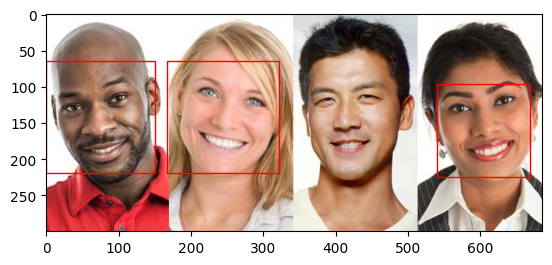

In [87]:
# Create figure and axes
fig, ax = plt.subplots()

# Display the image
ax.imshow(image)

# Create a Rectangle patch for each bounding box
for bbox in face_bboxes:
    top, right, bottom, left = bbox
    rect = patches.Rectangle((left, top), right-left, bottom-top, linewidth=1, edgecolor='r', facecolor='none')

    # Add the patch to the Axes
    ax.add_patch(rect)

plt.show()

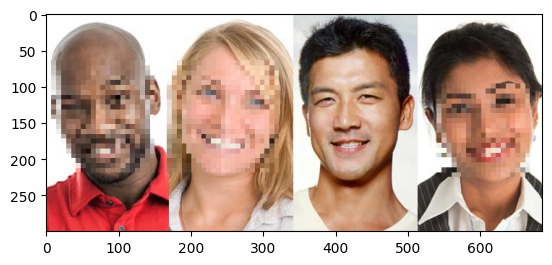

True

In [88]:
def add_mosaic(image, bbox, factor=0.1):
    image = image.copy()  # Create a copy of the image
    top, right, bottom, left = bbox
    face = image[top:bottom, left:right]
    h, w = face.shape[:2]
    small = cv2.resize(face, (int(w * factor), int(h * factor)), interpolation=cv2.INTER_LINEAR)
    face_mosaic = cv2.resize(small, (w, h), interpolation=cv2.INTER_NEAREST)
    image[top:bottom, left:right] = face_mosaic
    return image

mosaic_image = image.copy()
for bbox in face_bboxes:
    mosaic_image = add_mosaic(mosaic_image, bbox, factor=0.15)

plt.imshow(mosaic_image)
plt.show()

cv2.imwrite('../data/result/mosaic_faces.jpeg', cv2.cvtColor(mosaic_image, cv2.COLOR_RGB2BGR))

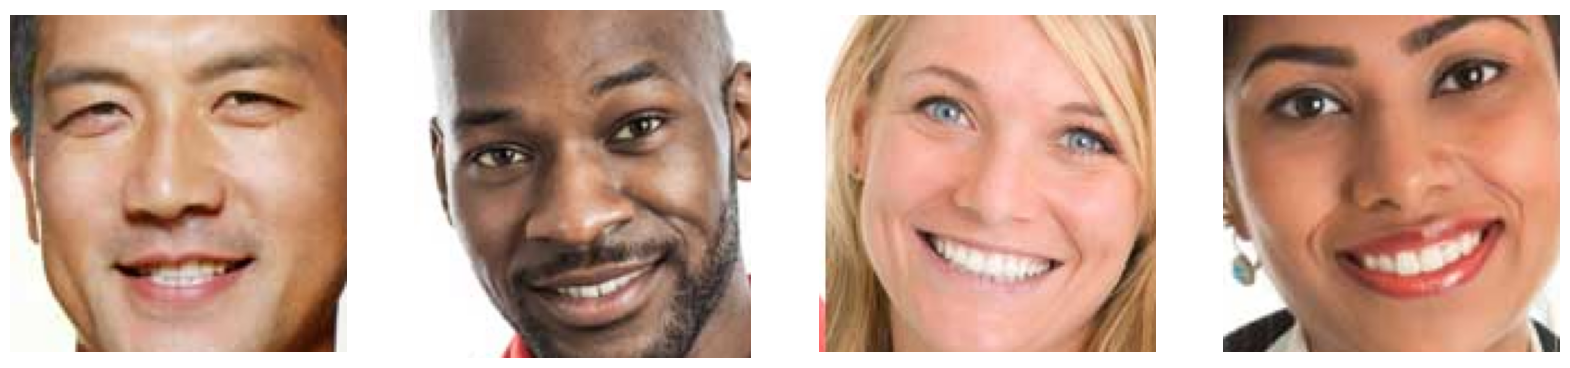

In [13]:
faces = []
for bbox in face_bboxes:
    top, right, bottom, left = bbox
    face = image[top:bottom, left:right]
    faces.append(face)

fig, axes = plt.subplots(1, len(faces), figsize=(20, 10))
for ax, face in zip(axes, faces):
    ax.imshow(face)
    ax.axis("off")
    
plt.show()

In [72]:
face_encodings = []
for face in faces:
    face_encoding = face_recognition.face_encodings(cv2.resize(face, (256, 256)))[0]
    face_encodings.append(face_encoding)



In [76]:
known_image = face_recognition.load_image_file("../data/raw/asian_guy.jpeg")
known_encoding = face_recognition.face_encodings(known_image)[0]

results = []
for i, face_encoding in enumerate(face_encodings):
    results.append(face_recognition.compare_faces([known_encoding], face_encoding)[0])

results


[True, False, False, False]

In [85]:
for i, result in enumerate(results):
    if result:
        face_bboxes.pop(i)

In [86]:
face_bboxes

[(64, 150, 219, 0), (64, 322, 219, 167), (96, 669, 225, 540)]